### Author: Vidhi Kokel
# Theoretical Questions

####🌈 Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?
#### ✅There are majorly two following reasons why linear regression model does not perform well for classification tasks.
1. In case of linear regression the predicted values are continuous whereas the classification tasks require categorical values i.e the ourcomes from linear regression are not probabilistic.
2. It is sensitive to imbalanced data.
##### Source: https://jinglescode.github.io/2019/05/07/why-linear-regression-is-not-suitable-for-classification/

####🌈What's a decision tree and how it is different to a logistic regression model?
#### ✅A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
Following are the differences between a decision treee and a logistic regression model:
1. Logistic regression looks like an equation between independent variables with respect to dependent variable but decision tree works on simple sentences which produces an outcome based on the decision statement.
2. Logistic regression is a parametric model that has parameter to predict the dependent variable but decision tree is a non-parametric model in which no parameter exists.
3. Assumptions can be made target variables with binomial or Bernoulli distribution but no assumptions can be made on the decision tree algorithm
4. Shape of the model is predefined as logistic curve but it is not predefined in decision tree algorithm
5. Logistic algorithms provide good results when independent variables are continuous in nature but decision trees produce results when the variables are categorical in nature.
6. Logistic regression finds it difficult to interact with non linear variables they do not affect the performance in case of decision tree algorithm.
7. Outliers and missing values reduce the performance of logistic regression but they do not affect the performance of decision tree algorithm.
##### Sources: https://www.ibm.com/topics/decision-trees
https://www.janbasktraining.com/community/data-science/how-logistic-regression-is-different-from-decision-tree

####🌈What's the difference between grid search and random search?
#### ✅Grid search does an exhaustive search from the provided hyper-parameters to give out the best possible combination from the provided parameters considering the best score received. On the other hand, random search randomly selects parameter values from the given range of hyper-parameters. That means if we have provided 3 different values for one parameter and 4 different values for another, then Grid search would try 12 different combinations whereas the random search would execute random combinations depending on the number of iterations provided or a distribution of the values. Thus, as grid search tries all the possible combinations it is computationally expensive than random search. But on the other hand grid search guarantees the best solution while random search does not.
##### Source: https://www.linkedin.com/pulse/what-gridsearchcv-randomizedsearchcv-differences-between-cheruku/

####🌈What's the difference between bayesian search and random search?
#### ✅The major difference between Bayesian search and the random search is that the tuning algorithm optimizes its parameter selection in each round according to the previous round score. Thus, instead of randomly choosing the next set of parameters, the algorithm optimizes the choice, and likely reaches the best parameter set faster than the previous two methods. Meaning, this method chooses only the relevant search space and discards the ranges that will most likely not deliver the best solution. Thus, it can be beneficial when you have a large amount of data, the learning is slow, and you want to minimize the tuning time.
##### Source: https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399


#Speed Dating Match Prediction

In [21]:
#Imports the required libraries, models and metrics
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from pprint import pprint

In [22]:
# Loading the training data
data = pd.read_csv('train.csv')
# Loading the test data
data_test = pd.read_csv('test.csv')
# Prints the dimensions of the training data
data.shape

(5909, 192)

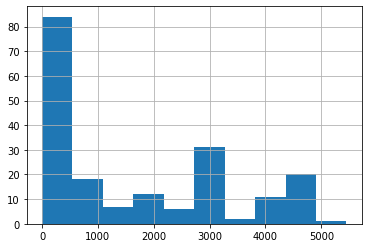

In [23]:
# isnull() - Checks the values of all columns for the data frame if it is null
# isnull().sum() - Adds the null values for each column
# isnull().sum().hist() - Generates a histogram for the resulting values
data.isnull().sum().hist()

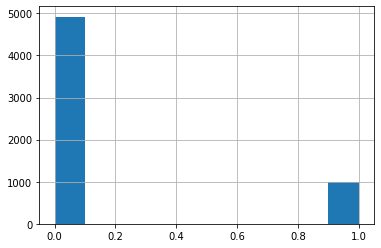

In [24]:
# Creates a histogram for the values in the match column of the training data
# Noticed that the data is imbalanced
data['match'].hist()

In [25]:
# Found exact number of records for each class
data.groupby("match")["id"].count()

match
0    4921
1     988
Name: id, dtype: int64

In [26]:
# Approach 1: Undersampling the no match records to the number of match records 
# we have in the data. i.e 988 (match records) + 988 (no match records) = 1976
# But it overfit the model on the data.
# Approach 2: Oversampling the match records to the number of no match records 
# we have in the data by replacing the same records. 
# i.e 4921 (no match records) + 4921 (match records) = 9842
# But it overfit the model as well.
# # balanced_data = []
# match_df = data.loc[data["match"] == 1]
# no_match_df = data.loc[data["match"] == 0]
# match_df = match_df.sample(n=(len(no_match_df) // 2), replace=True)
# no_match_df = no_match_df.sample(n=(len(no_match_df) // 2))
# # balanced_data = match_df + no_match_df.sample(n=len(match_df))
# data = pd.concat([match_df, no_match_df], ignore_index=True)
# data

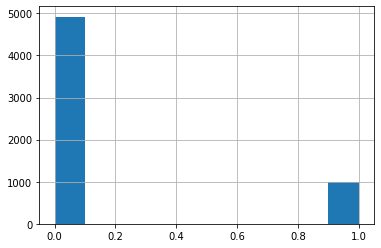

In [27]:
# data['match'].hist()

In [28]:
# if you haven't installed xgboost on your system, uncomment the line below
!pip install xgboost
# if you haven't installed bayesian-optimization on your system, uncomment the line below
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
# Create correlation matrix for all the features and drop the features 
# with more than 0.75 correlation
# Approach 3: Undersampling + removing correlated columns
# But that did not improve the performance significantly
# Approach 4: Upsampling + removing correlated columns
# cor_matrix = data.corr().abs()
# # Selecting the upper triangle of the matrix as the lower triangle is its mirror image
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# # Drop the columns with correlation value of more than 0.85
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
# print(to_drop)
# data = data.drop(to_drop, axis=1)
# data.shape

In [30]:
# Drop the match column from the training data and assign other columns to the variable x
x = data.drop('match', axis=1)
# List all columns with numeric values
features_numeric = list(x.select_dtypes(include=['float64']))
# List all columns with categorical values
features_categorical = list(x.select_dtypes(include=['object']))
# Extract the match column from the training data and assign it to the variable y
y = data['match']

In [31]:
# Print the categorical features in the training data
print(features_categorical)

['field', 'undergra', 'mn_sat', 'tuition', 'from', 'zipcode', 'income', 'career']


In [32]:
#Imports the required libraries, models and metrics
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Sets the seed so that everytime the same random values are generated
np.random.seed(0)

# Creates a pipeline to accommodate the steps to be applied for 
# numeric features in the training data
transformer_numeric = Pipeline(
    steps=[
        # SimpleImputer: Fills the missing value according to the provided strategy
        # Here we fill the missing values of numeric features with the median
        # of the values for that specific column
        ('imputer', SimpleImputer(strategy='mean')),
        # StandardScaler: Standardize numeric features by removing the mean and 
        # scaling to unit variance.
        ('scaler', StandardScaler())]
)

# Creates a pipeline to accommodate the steps to be applied for 
# categorical features in the training data
transformer_categorical = Pipeline(
    steps=[
        # Here we fill the missing values of categorical features with "missing"
        # value literally
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        # OneHotEncoder: Encode categorical features as a one-hot numeric array
        # Also here we ignore the unknown values
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

# Creates a data preprocessing pipeline to accommodate all the steps 
# to be applied for both numeric and categorical features in the training data
preprocessor = ColumnTransformer(
    transformers=[
        # Transform the numeric features according to the steps 
        # in the transformer_numeric pipeline
        ('num', transformer_numeric, features_numeric),
        # Transform the categorical features according to the steps 
        # in the transformer_categorical pipeline
        ('cat', transformer_categorical, features_categorical)
    ]
)

# Creates the full pipeline to accommodate all the steps 
# to be applied to the training data
full_pipline = Pipeline(
    steps=[
        # Execute the preprocessing pipeline
        ('preprocessor', preprocessor),
        # Execute a classifier on the training data
        ('my_classifier', XGBClassifier())
    ]
)

In [33]:
# With Approach 3 & 4 tried to tune the following parameters and found the 
# parameters applied to be optimal
#  param_grid = {
#     'preprocessor__num__imputer__strategy': ['mean', 'median'],
#     'my_classifier__learning_rate': [0.1, 0.01, 0.001],
#     'my_classifier__gamma': [0.1, 0.2, 0.5],
#     'my_classifier__colsample_bytree': [0.5, 0.6, 0.7],
#     'my_classifier__n_estimators': [50, 100, 200, 500],
#     # 'my_classifier__algorithm': ["SAMME", "SAMME.R"],
#     'my_classifier__max_depth':[4, 6, 10]
# }

# `__` denotes attribute 
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`
#  which is our xgb)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    'my_classifier__learning_rate': [0.1],
    'my_classifier__gamma': [0.1],
    'my_classifier__colsample_bytree': [0.5],
    'my_classifier__n_estimators': [100],
    # 'my_classifier__algorithm': ["SAMME", "SAMME.R"],
    'my_classifier__max_depth':[6, 10]
}

# Prepare the grid_search parameters
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=5, verbose=3, n_jobs=2, 
    scoring='roc_auc')

#Train the data using grid search
grid_search.fit(x, y)

# Print the best score from all the executions performed using grid search
print('best score {}'.format(grid_search.best_score_))
# Print the best parameters that generate the best score from all the executions
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
best score 0.8815073869371008
best score {'my_classifier__colsample_bytree': 0.5, 'my_classifier__gamma': 0.1, 'my_classifier__learning_rate': 0.1, 'my_classifier__max_depth': 6, 'my_classifier__n_estimators': 100, 'preprocessor__num__imputer__strategy': 'mean'}


In [34]:
# Generated grid search, random search and bayes search results for each approach mentioned above 
# prepare submission:
submission = pd.DataFrame()
submission['id'] = data_test['id']
submission['match'] = grid_search.predict_proba(data_test)[:,1]
submission.to_csv('sample_submission_walkthrough.csv', index=False)
submission

,id,match
0,934,0.062420
1,6539,0.669651
2,6757,0.243797
3,2275,0.058605
4,1052,0.013576
...,...,...
2464,7982,0.128562
2465,7299,0.461810
2466,1818,0.138659
2467,937,0.021414


In [35]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'my_classifier__learning_rate': [0.1, 0.01, 0.001],
    'my_classifier__gamma': [0.1, 0.2, 0.5],
    'my_classifier__colsample_bytree': [0.5, 0.6, 0.7],
    'my_classifier__n_estimators': [50, 100, 200, 500],
    # 'my_classifier__algorithm': ["SAMME", "SAMME.R"],
    'my_classifier__max_depth':[4, 6, 10]
}

# Prepare the grid_search parameters
random_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=5, verbose=3, n_jobs=2, n_iter=10,
    scoring='roc_auc')

#Train the data using grid search
random_search.fit(x, y)

# Print the best score from all the executions performed using grid search
print('best score {}'.format(random_search.best_score_))
# Print the best parameters that generate the best score from all the executions
print('best score {}'.format(random_search.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best score 0.8804560360470042
best score {'preprocessor__num__imputer__strategy': 'median', 'my_classifier__n_estimators': 500, 'my_classifier__max_depth': 6, 'my_classifier__learning_rate': 0.1, 'my_classifier__gamma': 0.2, 'my_classifier__colsample_bytree': 0.6}


In [36]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = data_test['id']
submission['match'] = random_search.predict_proba(data_test)[:,1]
submission.to_csv('sample_submission_walkthrough_random_search.csv', index=False)
submission

,id,match
0,934,0.011742
1,6539,0.555158
2,6757,0.062904
3,2275,0.017215
4,1052,0.000366
...,...,...
2464,7982,0.013306
2465,7299,0.608189
2466,1818,0.047708
2467,937,0.000724


In [17]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-8, 1e+8, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+3, prior='log-uniform'),
        'my_svc__degree': Integer(1,10),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
        'my_svc__probability': [True]
    },
    n_iter=1,
    random_state=0,
    verbose=3,
)

bayes_search.fit(x, y)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_svc__C=3.1291518524476603, my_svc__degree=7, my_svc__gamma=0.4021497227847272, my_svc__kernel=poly, my_svc__probability=True;, score=0.836 total time=  48.0s
[CV 2/5] END my_svc__C=3.1291518524476603, my_svc__degree=7, my_svc__gamma=0.4021497227847272, my_svc__kernel=poly, my_svc__probability=True;, score=0.820 total time=  46.6s
[CV 3/5] END my_svc__C=3.1291518524476603, my_svc__degree=7, my_svc__gamma=0.4021497227847272, my_svc__kernel=poly, my_svc__probability=True;, score=0.821 total time=  46.4s
[CV 4/5] END my_svc__C=3.1291518524476603, my_svc__degree=7, my_svc__gamma=0.4021497227847272, my_svc__kernel=poly, my_svc__probability=True;, score=0.825 total time=  50.0s
[CV 5/5] END my_svc__C=3.1291518524476603, my_svc__degree=7, my_svc__gamma=0.4021497227847272, my_svc__kernel=poly, my_svc__probability=True;, score=0.828 total time=  46.2s


BayesSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                         ColumnTransformer(transformers=[('num',
                                                                          Pipeline(steps=[('imputer',
                                                                                           SimpleImputer()),
                                                                                          ('scaler',
                                                                                           StandardScaler())]),
                                                                          ['positin1',
                                                                           'pid',
                                                                           'int_corr',
                                                                           'age_o',
                                                                           'race_o',
             

In [18]:
print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

best score 0.825859240570167
best score OrderedDict([('my_svc__C', 3.1291518524476603), ('my_svc__degree', 7), ('my_svc__gamma', 0.4021497227847272), ('my_svc__kernel', 'poly'), ('my_svc__probability', True)])


In [19]:
print('all the cv scores')
pprint(bayes_search.cv_results_)

all the cv scores
{'mean_fit_time': array([46.13990574]),
 'mean_score_time': array([1.30842395]),
 'mean_test_score': array([0.82585924]),
 'param_my_svc__C': masked_array(data=[3.1291518524476603],
             mask=[False],
       fill_value='?',
            dtype=object),
 'param_my_svc__degree': masked_array(data=[7],
             mask=[False],
       fill_value='?',
            dtype=object),
 'param_my_svc__gamma': masked_array(data=[0.4021497227847272],
             mask=[False],
       fill_value='?',
            dtype=object),
 'param_my_svc__kernel': masked_array(data=['poly'],
             mask=[False],
       fill_value='?',
            dtype=object),
 'param_my_svc__probability': masked_array(data=[True],
             mask=[False],
       fill_value='?',
            dtype=object),
 'params': [OrderedDict([('my_svc__C', 3.1291518524476603),
                         ('my_svc__degree', 7),
                         ('my_svc__gamma', 0.4021497227847272),
                      

In [20]:
# prepare submission:
submission = pd.DataFrame()
submission['id'] = data_test['id']
submission['match'] = bayes_search.predict_proba(data_test)[:,1]
submission.to_csv('sample_submission_walkthrough_bayes_search.csv', index=False)
submission

,id,match
0,934,0.118564
1,6539,0.394682
2,6757,0.115056
3,2275,0.137783
4,1052,0.099068
...,...,...
2464,7982,0.104989
2465,7299,0.341948
2466,1818,0.171885
2467,937,0.064029
